In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Функція завантаження даних

In [435]:

def load_data():
  data = pd.read_csv("../Laba3Data/Automobile_data.csv", na_values='?')
  return data


Завантажую дані

In [436]:
data = load_data()

print(data)

     symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [437]:
print(data["engine-location"].sort_values())

0      front
131    front
132    front
133    front
134    front
       ...  
66     front
54     front
127     rear
128     rear
126     rear
Name: engine-location, Length: 205, dtype: object


Перевіряю дані на цілісність

In [438]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [439]:
print(data["normalized-losses"].sort_values())

177    65.0
176    65.0
175    65.0
174    65.0
173    65.0
       ... 
181     NaN
189     NaN
191     NaN
192     NaN
193     NaN
Name: normalized-losses, Length: 205, dtype: float64


Очищаю дані та оброблюю відсутні. Якщо просто видалити рядки з відсутніми значеннями, то ми втратимо 46 рядків з 205, а також втратиться один тип двигунів, rear, тому потрібно буде подумати чим замінити дані дані.
Значення яких даних не вистачає та їх типи:
normalized-losses      float64
num-of-doors           object 
bore                   float64
stroke                 float64
horsepower             float64
peak-rpm               float64
price                  float64

Для полів normalized-losses, bore, stroke, horsepower та peak-rpm можна задати середні значення цих параметрів. Для параметра num-of-doors можна використати найрозповсюдженіше значення. Для поля price можна використати середнє значення, але лише для розвідувального аналізу

In [440]:
data["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Оскільки num-of-doors має лише 2 можливі варіанти і варіант "four" зустрічається більш ніж у половині випадків, то заповнимо нани цим значенням

In [441]:
data['num-of-doors'] = data['num-of-doors'].fillna("four")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Знаходимо середні значення для полів price, normalized-losses, bore, stroke, horsepower та peak-rpm, та заповнюємо середніми значеннями. Перед цим зберігаємо попередню версію поля price, оскільки при наступному аналізі необхідно буде видалити поля з невідомими цінами.

In [442]:
def fill_mean(df, column_name):
  df[column_name] = df[column_name].fillna(df[column_name].mean())

prices = pd.DataFrame()

prices["prices"] = data["price"]

fill_mean(data, "price")
fill_mean(data, "normalized-losses")
fill_mean(data, "bore")
fill_mean(data, "stroke")
fill_mean(data, "horsepower")
fill_mean(data, "peak-rpm")




In [443]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Вношу імпорти з прикладів

In [444]:
import numpy as numpy
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

Будую графік для аналізу цін.

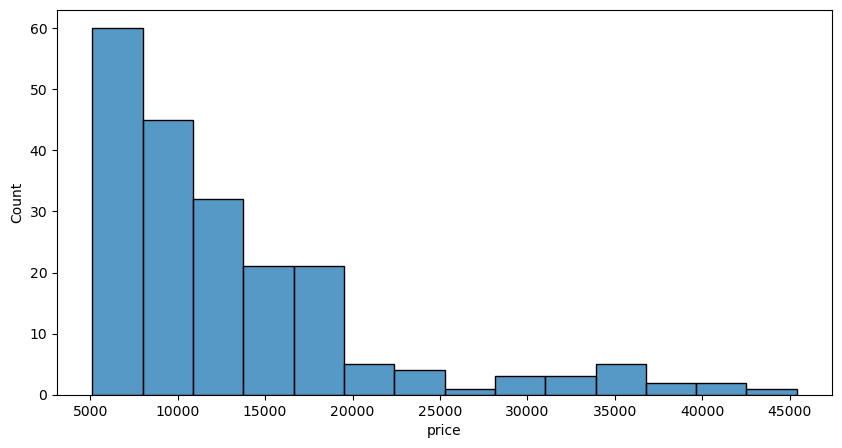

In [445]:
sns.histplot(x='price', data=data)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Оскільки в нас дані по середній ціні за деякі моделі автомобілів, а не по кожному окремому, то ми можемо з цього графіка зробити висновок, що найбільше дешевих моделей, а зі зростанням ціни їх кількість зменшується. Найбільший спад з 15к до 20к, до того ж моделей у ціновому сегменті з 25к до 30к найменша кількість (якщо не враховувати що моделей ціною у 45к і більше немає)

Проаналізую кількість дверей

<Axes: xlabel='num-of-doors'>

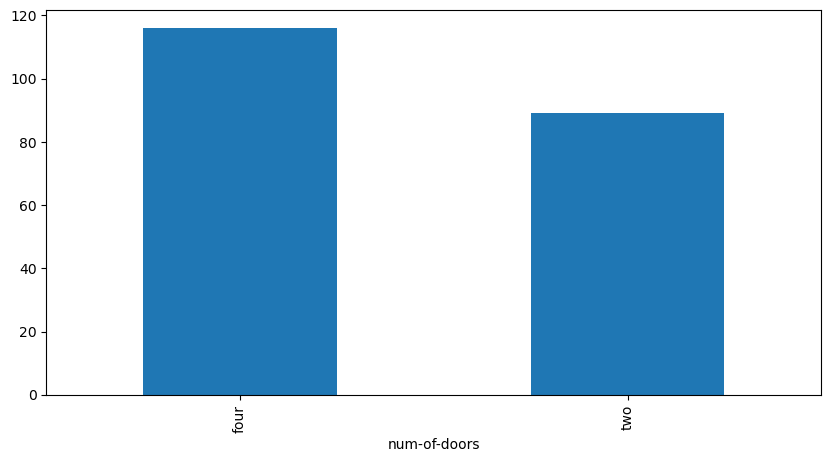

In [446]:
data['num-of-doors'].value_counts().plot(kind="bar")


Моделей автомобілів з 4 дверима більше, ніж з двома

Проаналізую виробників

<Axes: xlabel='make'>

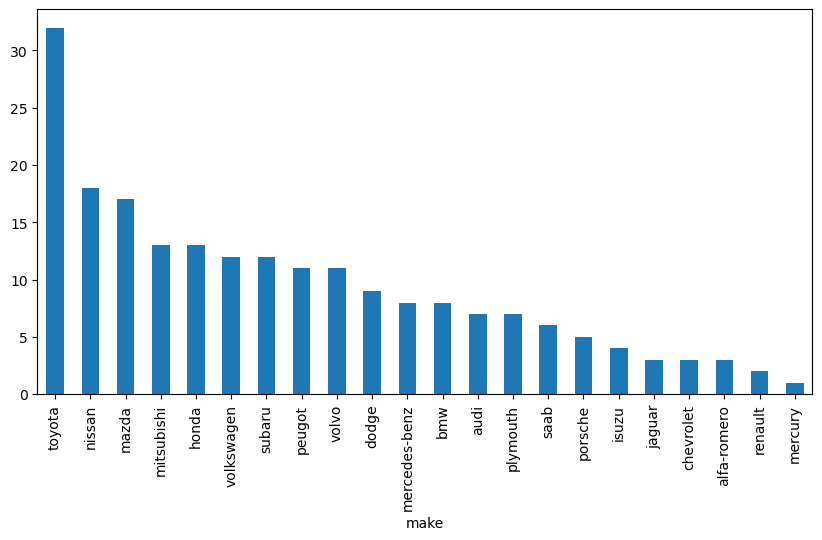

In [447]:
data["make"].value_counts().plot(kind="bar")


Найбільше моделей автомобілів виробила тойота, трохи менше виробили нісан і мазда. Найменшу кількість автомобілів виробили меркурі, ренаулт та альфа-ромеро.

Аналіз моделей за типом пального

<Axes: ylabel='count'>

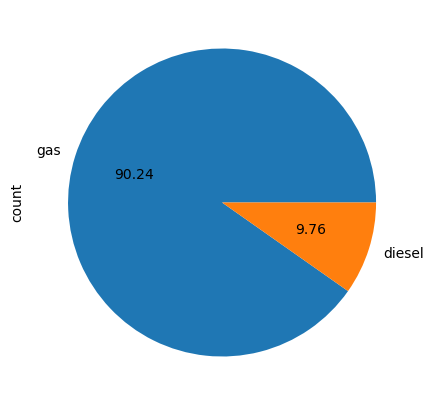

In [448]:
data["fuel-type"].value_counts().plot.pie(autopct="%.2f")

90.24 моделей автомобілів працюють на бензині, 9.76 на дизельному паливі.

<Axes: ylabel='count'>

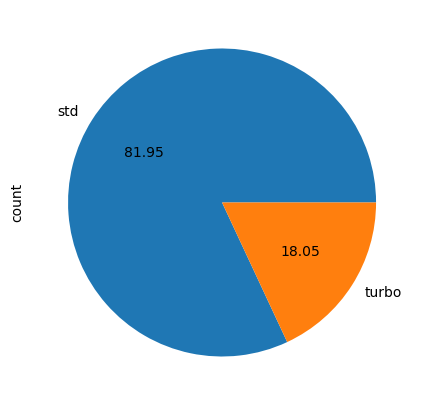

In [449]:
data["aspiration"].value_counts().plot.pie(autopct="%.2f")

81.95 моделей автомобілів мають aspiration std, 18.05 - turbo

<Axes: ylabel='count'>

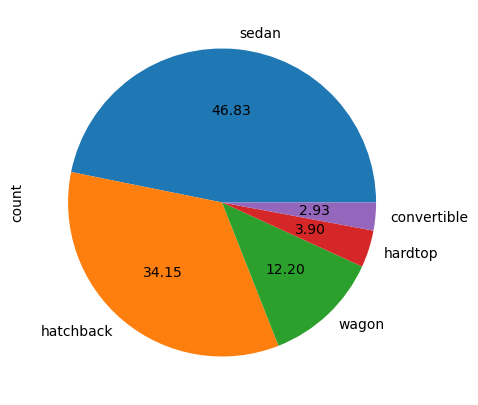

In [450]:
data["body-style"].value_counts().plot.pie(autopct="%.2f")

<Axes: ylabel='count'>

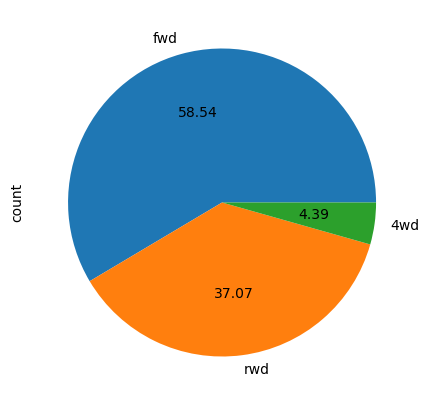

In [451]:
data["drive-wheels"].value_counts().plot.pie(autopct="%.2f")

<Axes: ylabel='count'>

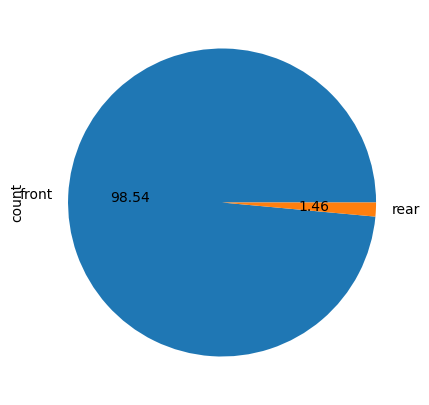

In [452]:
data["engine-location"].value_counts().plot.pie(autopct="%.2f")

<Axes: ylabel='count'>

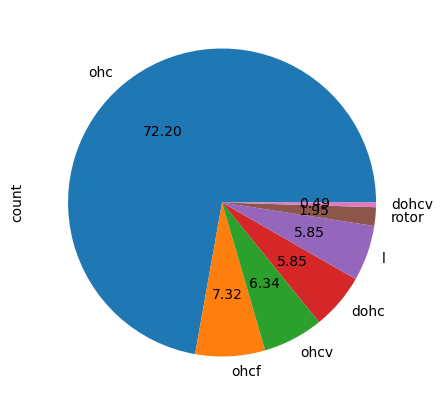

In [453]:
data["engine-type"].value_counts().plot.pie(autopct="%.2f")

<Axes: ylabel='count'>

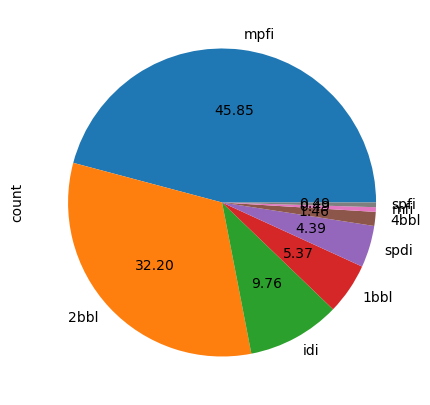

In [454]:
data["fuel-system"].value_counts().plot.pie(autopct="%.2f")

<Axes: ylabel='Frequency'>

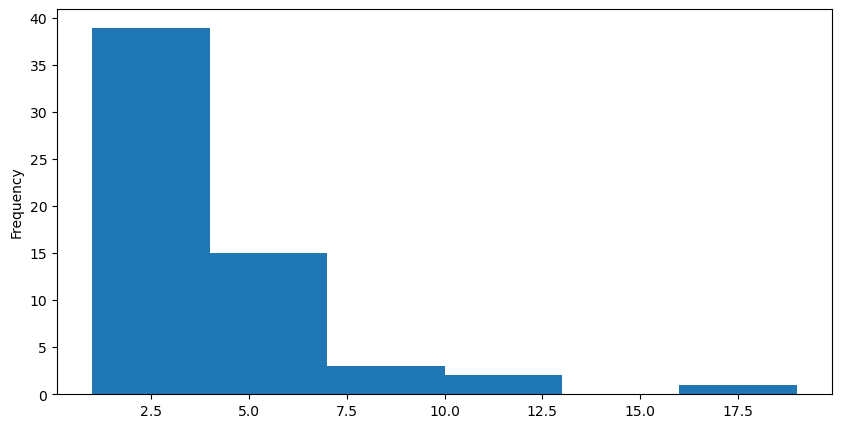

In [455]:
data["horsepower"].value_counts().plot.hist(bins=6)

C:\ProgramData\miniconda3\envs\laba1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


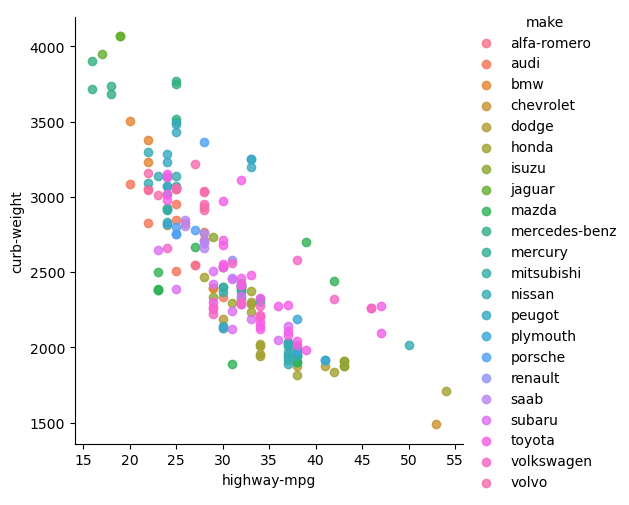

In [456]:
sns.lmplot(x="highway-mpg", y="curb-weight", data=data, hue="make",fit_reg=False)

C:\ProgramData\miniconda3\envs\laba1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


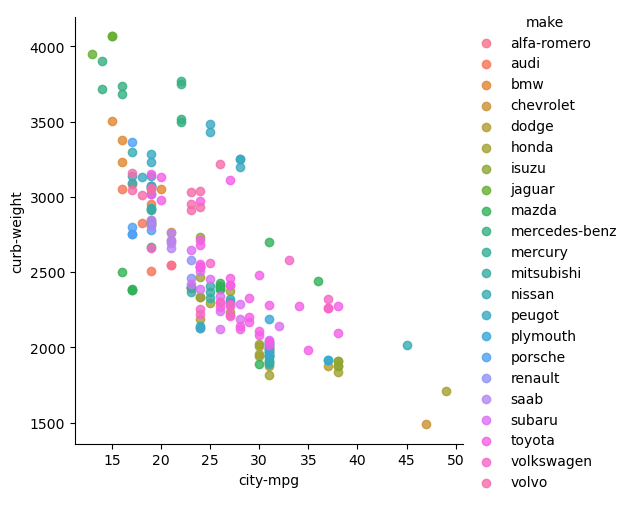

In [457]:
sns.lmplot(x="city-mpg", y="curb-weight", data=data, hue="make",fit_reg=False)

Бачимо, що чим менше автоммобіль важить, тим швидче він їздить

C:\ProgramData\miniconda3\envs\laba1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


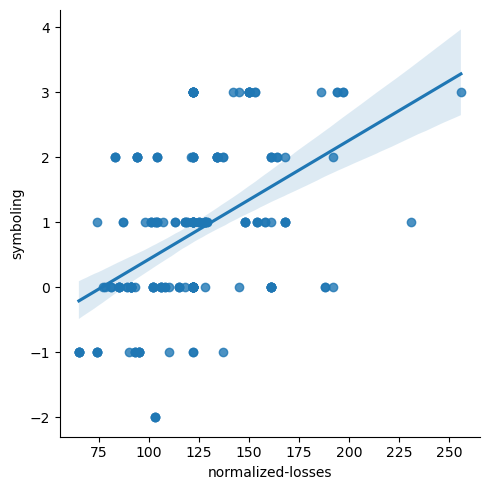

In [458]:
g = sns.lmplot(x="normalized-losses", y="symboling",data=data)

Чим більше втрати на автомобіль, тим кращий страховий рейтинг.

<Axes: xlabel='make', ylabel='price'>

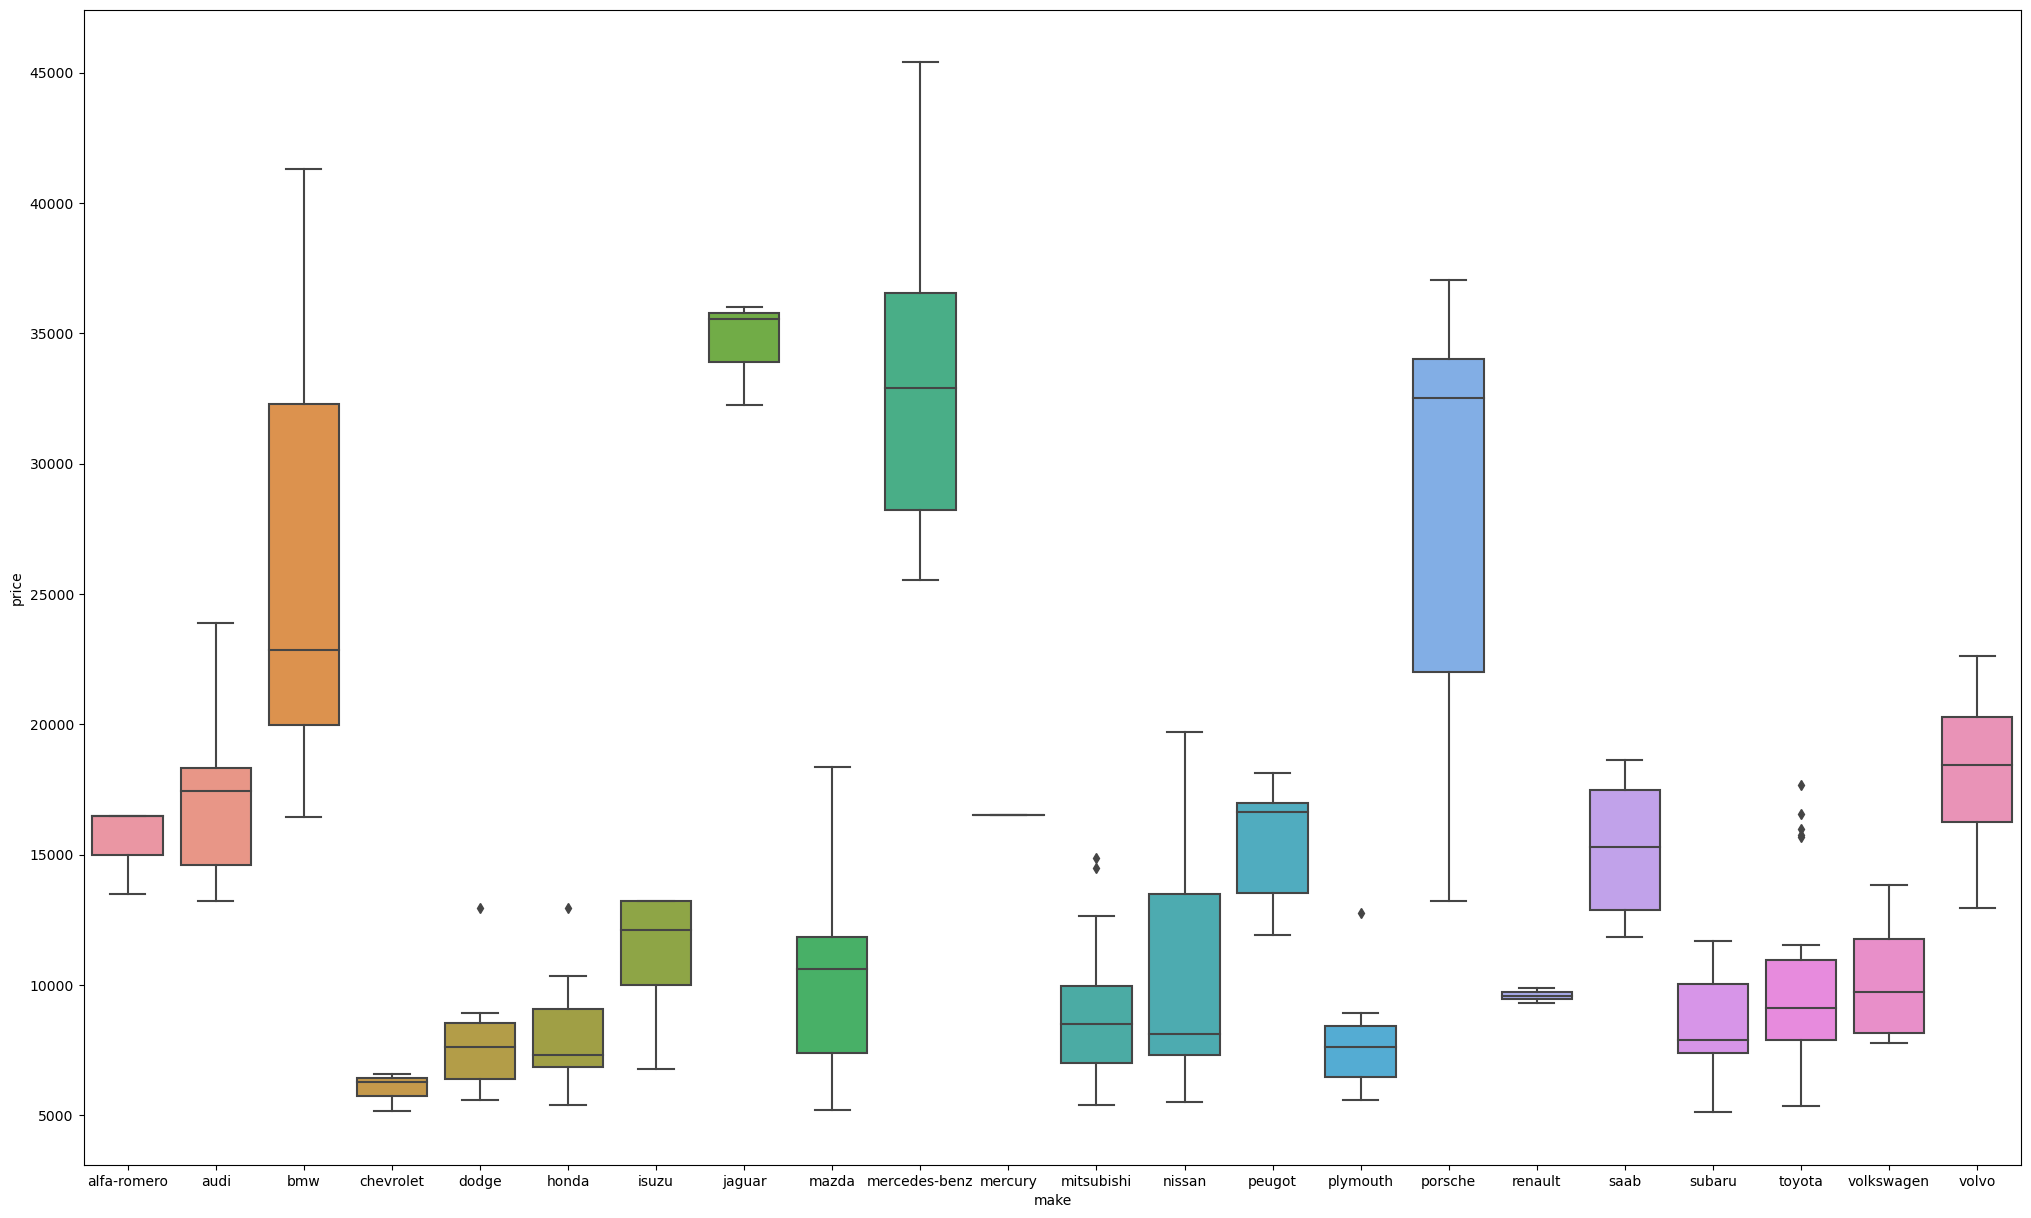

In [459]:
plt.rcParams["figure.figsize"] = (25,15)
sns.boxplot(x = "make",y= "price",data=data)

Меркурі виробляє автомобілі в одній категорії, судячи по графіку (або відсутні дані про інші моделі). Тойота виробляє автомобілі в ніші недорогих автомобілів. Бмв, порше, мерседес та ягуар виробляють дорогі моделі автомобілів.

Трансформую текстові дані в набір цифрових значень. Кожне унікальне текстове значення в колонці отримує свій номер і заміняється на нього.

In [460]:
label_encoder = LabelEncoder()

for colum in data.columns:
  try:
    if data[colum].dtype == "object":
      data[colum] = label_encoder.fit_transform(data[colum])
  except:
    {}
columns = [{'index':i, 'feature':x} for i,x in enumerate(data.columns.array)]

Провожу аналіз на кореляцію між параметрами.

In [461]:
corr = data.corr()

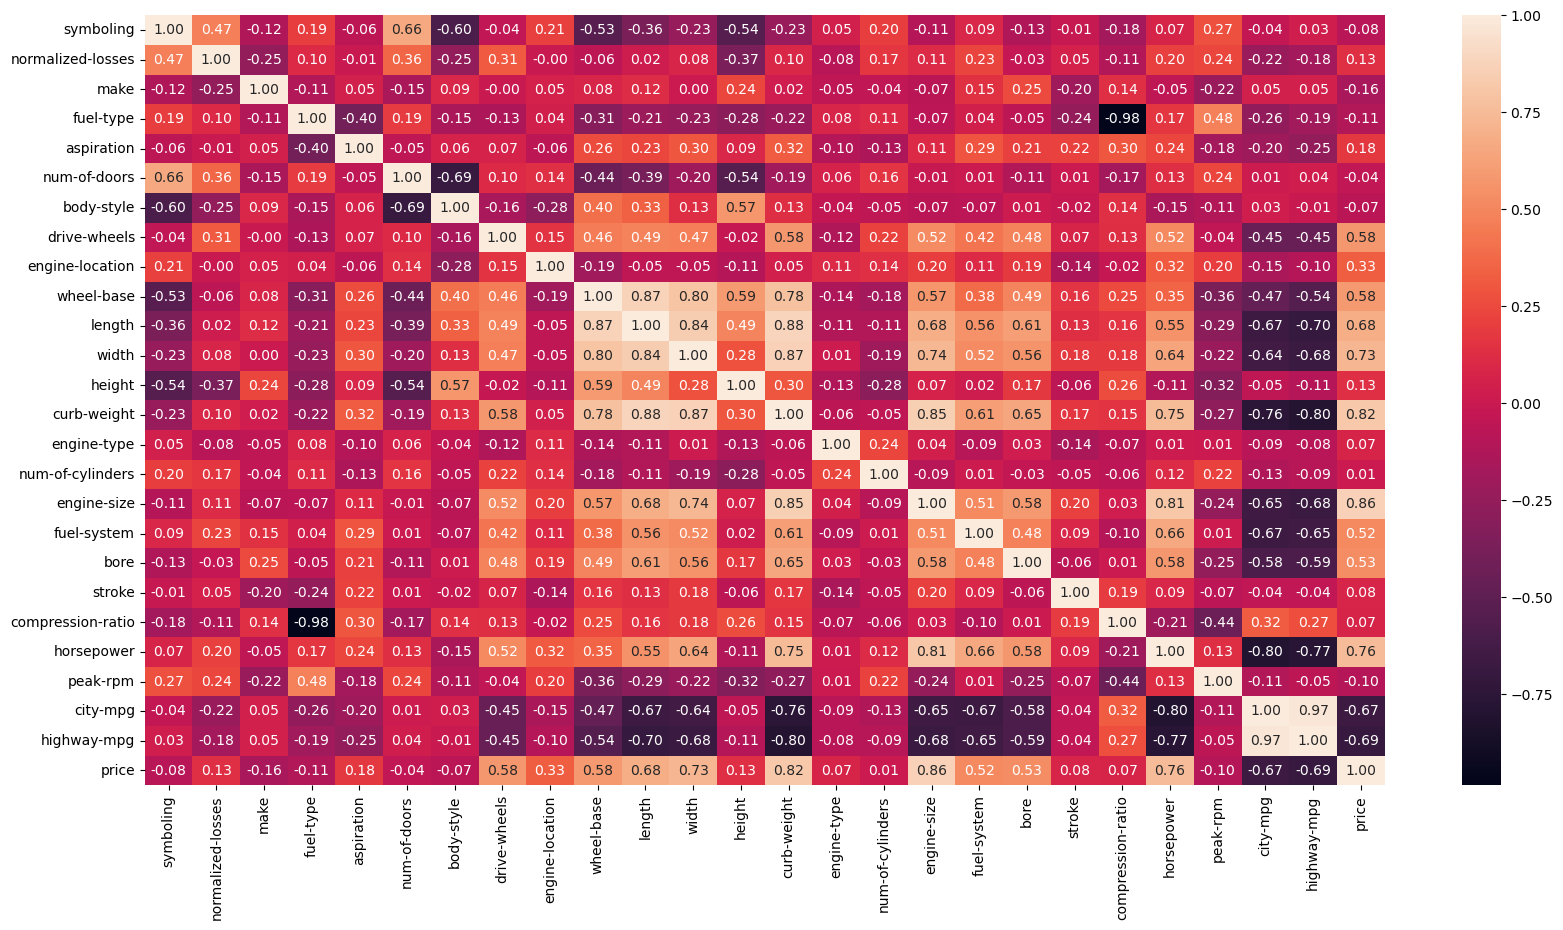

In [462]:

plt.figure(figsize=(20,10))
a = sns.heatmap(corr,annot = True,fmt=".2f")

Ми можемо побачити що "fuel-type" незалежить від "compression-ratio", "wheel-base", "length", "width", "height" та "curb-weight" корелюють між собою. "horsepower" залежить від "engine-size", "curb-weight", "price", "width" та "height" параметрів. "city-mpg" та "highway-mpg" дуже сильно корелюють одне з одним.

Аналізуємо дані на повтори. Якщо брати перші 100 значень як тренувальні, а всі наступні як тестові, то engine-location завжди матиме значення front, тому воно видалить дані. Наврядче це на щось сильно вплине, але я і так викинув чверть даних, тому для тренувального сету візьму останні +- 100 рядків.


In [463]:
from sklearn.feature_selection import VarianceThreshold

# create some synthesized dataset
train_set = data[150:]# the first feature have zero variance
# array([[1, 2, 3],
#        [1, 4, 7],
#        [1, 4, 9]])

test_set = data[:150]# the second feature have zero variance
# array([[3, 2, 3],
#        [1, 2, 7]])

selector = VarianceThreshold()
selector.fit(train_set) # fit on trainset
transformed_train = selector.transform(train_set) # transform train set
# the first feature has been removed
# array([[2, 3],
#        [4, 7],
#        [4, 9]])

transformed_test = selector.transform(test_set) # transform test set
# array([[2, 3],

In [464]:
transformed_test[0]

array([3.0000e+00, 1.2200e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 2.0000e+00, 8.8600e+01, 1.6880e+02,
       6.4100e+01, 4.8800e+01, 2.5480e+03, 0.0000e+00, 2.0000e+00,
       1.3000e+02, 5.0000e+00, 3.4700e+00, 2.6800e+00, 9.0000e+00,
       1.1100e+02, 5.0000e+03, 2.1000e+01, 2.7000e+01, 1.3495e+04])

Проводжу імпорт для Pearson Correlation

In [465]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr

Роблю аналіз Pearson Correlation

In [466]:
X = np.array(data.drop('price',axis=1))
y = np.array(data['price'])

train_set = X[150:]

test_set = X[:150]
train_y = y[150:]

def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T]) # list of (pearsonr, p-value)
    return np.absolute(result[:,0]), result[:,1] 

selector = SelectKBest(udf_pearsonr, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset
transformed_train = selector.transform(train_set) # transform trainset

transformed_train.shape #(15000, 2), select the 1st and 7th features

#print(transformed_train)
#print(train_set["width"] + train_set["curb-weight"])
#print(train_set[:,[9,13]])
assert np.array_equal(transformed_train, train_set[:,[9,13]]) 

transformed_test = selector.transform(test_set)
assert np.array_equal(transformed_test, test_set[:,[9,13]])

C:\ProgramData\miniconda3\envs\laba1\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Результати кореляції між параметрам:

In [467]:
# validate the result
for idx in range(train_set.shape[1]):
    pea_score, p_value = pearsonr(train_set[:,idx], train_y)
    print(f"The absolute value of the correlation between the {idx + 1} feature and target is {round(np.abs(pea_score),2)},p-value is {round(p_value,3)}")
# so we should select the 1st and 7th features

The absolute value of the correlation between the 1 feature and target is 0.39,p-value is 0.003
The absolute value of the correlation between the 2 feature and target is 0.04,p-value is 0.795
The absolute value of the correlation between the 3 feature and target is 0.65,p-value is 0.0
The absolute value of the correlation between the 4 feature and target is 0.05,p-value is 0.699
The absolute value of the correlation between the 5 feature and target is 0.51,p-value is 0.0
The absolute value of the correlation between the 6 feature and target is 0.2,p-value is 0.138
The absolute value of the correlation between the 7 feature and target is 0.13,p-value is 0.338
The absolute value of the correlation between the 8 feature and target is 0.62,p-value is 0.0
The absolute value of the correlation between the 9 feature and target is nan,p-value is nan
The absolute value of the correlation between the 10 feature and target is 0.86,p-value is 0.0
The absolute value of the correlation between the 1

C:\ProgramData\miniconda3\envs\laba1\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Заносю результати кореляції в масив для майбутнього виводу

In [468]:

PC_results = []
for idx in range(train_set.shape[1]):
  pea_score, p_value = pearsonr(train_set[:,idx], train_y)
  PC_results.append([columns[idx]["feature"],round(np.abs(pea_score),2)])
  print(f"The absolute value of the correlation between the {idx + 1} feature and target is {round(np.abs(pea_score),2)},p-value is {round(p_value,3)}")



The absolute value of the correlation between the 1 feature and target is 0.39,p-value is 0.003
The absolute value of the correlation between the 2 feature and target is 0.04,p-value is 0.795
The absolute value of the correlation between the 3 feature and target is 0.65,p-value is 0.0
The absolute value of the correlation between the 4 feature and target is 0.05,p-value is 0.699
The absolute value of the correlation between the 5 feature and target is 0.51,p-value is 0.0
The absolute value of the correlation between the 6 feature and target is 0.2,p-value is 0.138
The absolute value of the correlation between the 7 feature and target is 0.13,p-value is 0.338
The absolute value of the correlation between the 8 feature and target is 0.62,p-value is 0.0
The absolute value of the correlation between the 9 feature and target is nan,p-value is nan
The absolute value of the correlation between the 10 feature and target is 0.86,p-value is 0.0
The absolute value of the correlation between the 1

Перетворюю масив для зручнішої роботи

In [469]:

PC_results = pd.DataFrame(PC_results, columns=["feature", "value"])
PC_results.set_index("feature", inplace=True)

Створюю графік кореляції ціни автомобіля від параметрів.

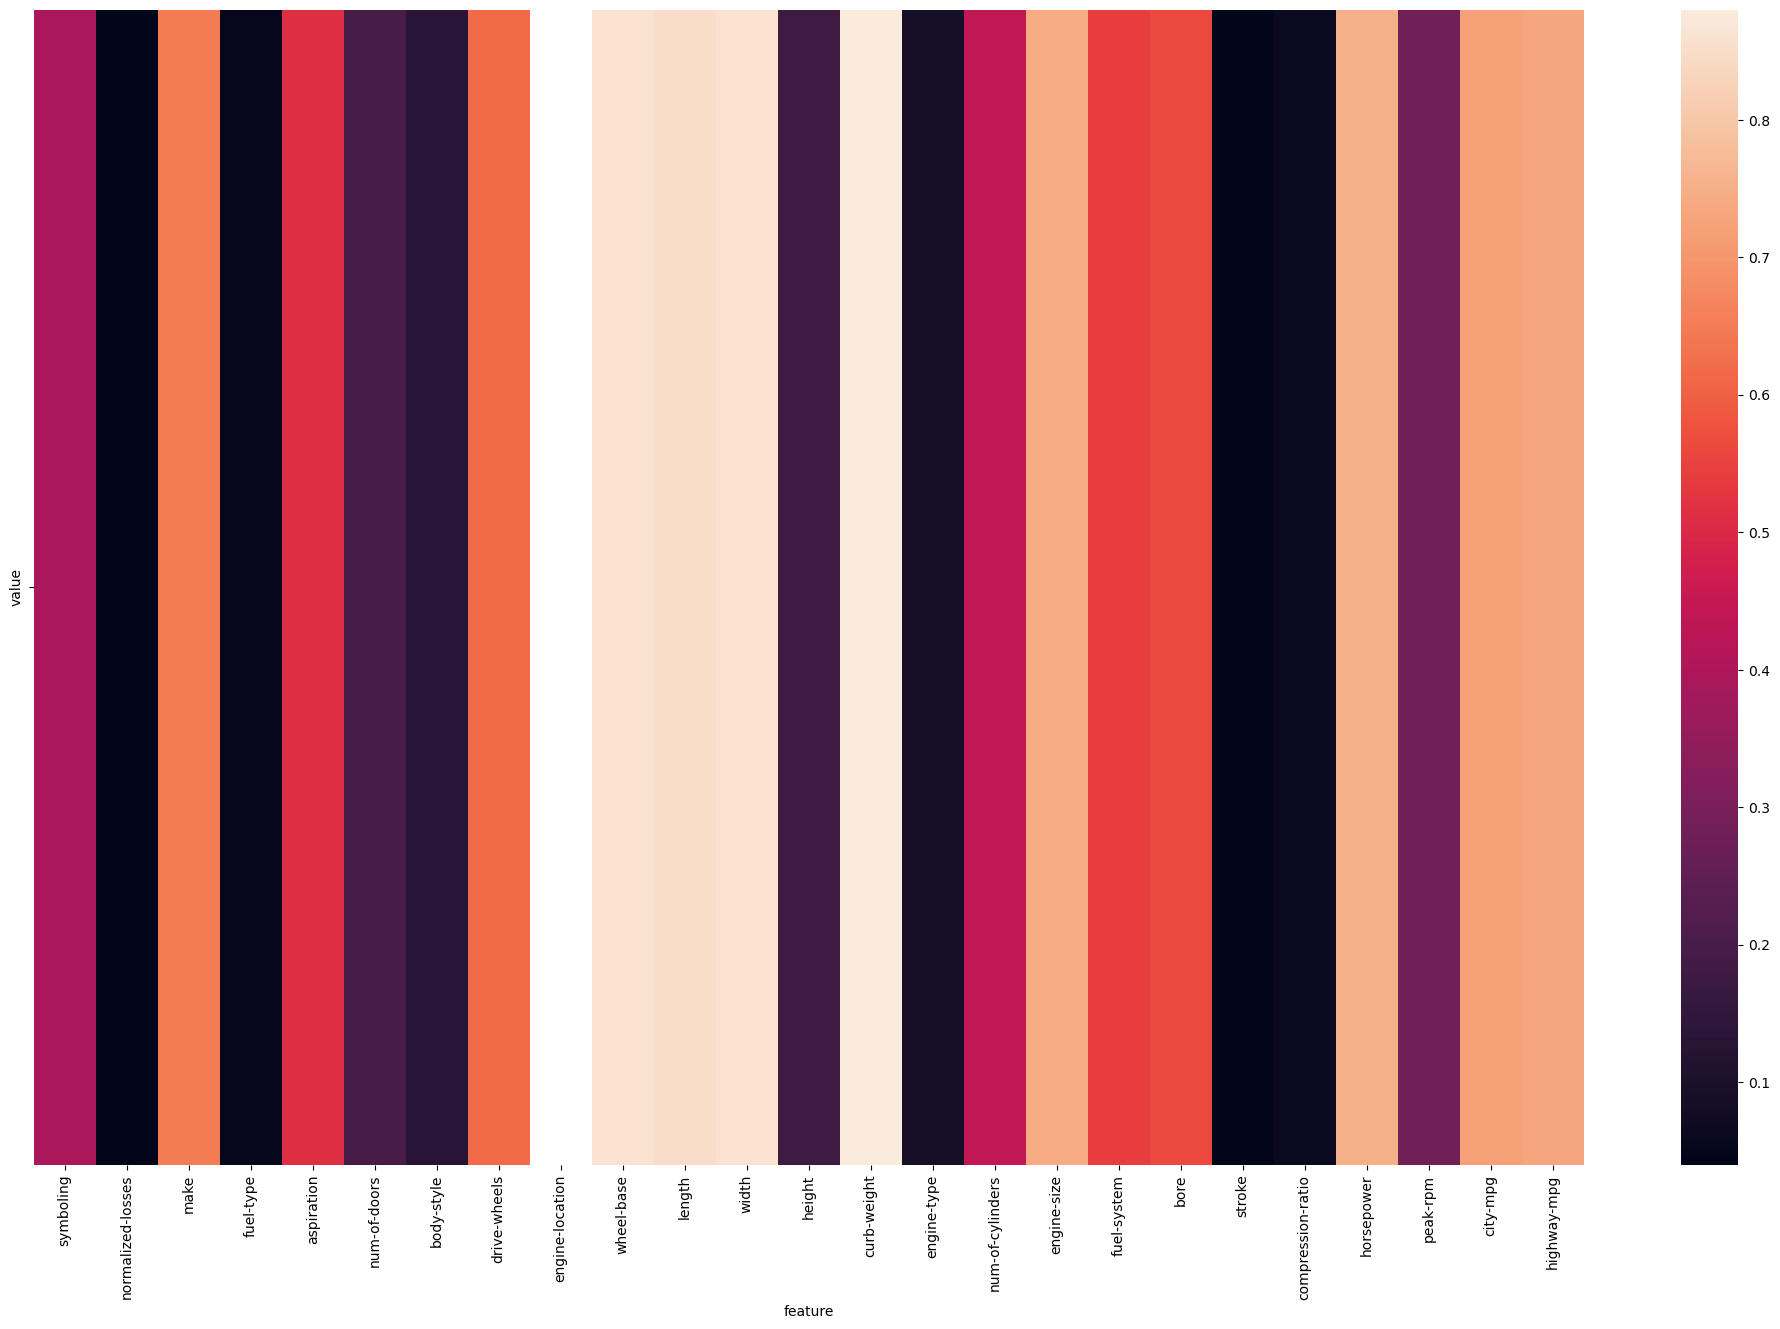

In [483]:
# setting the parameter values 
cbar = False
  
# plotting the heatmap 
hm = sns.heatmap(data=PC_results.transpose()) 
  
# displaying the plotted heatmap 
plt.show() 


За результатом аналізу:
Найбільший вплив на ціну мають параметри wheel-base, length, width, curb-weight, engine-size, horsepower, city-mpg та highway-mpg
Найменше на ціну впливають peak-rpm, compression-ratio, stroke, engine-type, height, body-style, num-of-doors, fuel-type, make, normalized-losses, symboling

Mutual Information аналіз

In [471]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# since n_neighbors in the KNN is also a very important parameters
# so we write a new MI function function based on pre-built MI function in sklearn
# to allow more flexibility

def udf_MI(X, y):
    result = mutual_info_regression(X, y, n_neighbors = 5) # user_defined n_neighbors
    return result

selector = SelectKBest(udf_MI, k=2) # k => number of top features to select
selector.fit(train_set, train_y) # fit on trainset
transformed_train = selector.transform(train_set) # transform trainset
transformed_train.shape #(15000, 2), select the 1st and 8th features

# print(train_set[:,[13, 24]])

assert np.array_equal(transformed_train, train_set[:,[13, 24]]) # return True

transformed_test = selector.transform(test_set) # transform test set
assert np.array_equal(transformed_test, test_set[:,[13, 24]])
# the 1st and 8th features are selected

Заносимо результат в змінну

In [472]:
# validate the result
MI_result = []
for idx in range(train_set.shape[1]):
    score = mutual_info_regression(train_set[:,idx].reshape(-1,1), train_y, n_neighbors = 5)
    MI_result.append([columns[idx]["feature"],round(score[0],2)])
# so we should select the 1st and 8th features

Результат

In [473]:
MI_result

[['symboling', 0.29],
 ['normalized-losses', 0.11],
 ['make', 0.22],
 ['fuel-type', 0.03],
 ['aspiration', 0.14],
 ['num-of-doors', 0],
 ['body-style', 0.02],
 ['drive-wheels', 0.26],
 ['engine-location', 0.0],
 ['wheel-base', 0.63],
 ['length', 0.67],
 ['width', 0.54],
 ['height', 0.07],
 ['curb-weight', 0.84],
 ['engine-type', 0.05],
 ['num-of-cylinders', 0.12],
 ['engine-size', 0.32],
 ['fuel-system', 0.34],
 ['bore', 0.21],
 ['stroke', 0.35],
 ['compression-ratio', 0.1],
 ['horsepower', 0.45],
 ['peak-rpm', 0.28],
 ['city-mpg', 0.51],
 ['highway-mpg', 0.77]]

Створюємо новий датафрейм на основі результату для зручнішої роботи з даними

In [474]:
res = pd.DataFrame(MI_result, columns=["feachures","values"])

Виводимо змінні, які за Mutual Information аналізом, не впливають на ціну автомобіля

In [475]:
res[res["values"] == 0]

,feachures,values
5,num-of-doors,0.0
8,engine-location,0.0


Сортуємо стовбці, які впливають на ціну автомобіля

In [476]:

res[res["values"] != 0].sort_values(by="values", axis=0)

,feachures,values
6,body-style,0.02
3,fuel-type,0.03
14,engine-type,0.05
12,height,0.07
20,compression-ratio,0.10
1,normalized-losses,0.11
15,num-of-cylinders,0.12
4,aspiration,0.14
18,bore,0.21
2,make,0.22


За цим аналізом, найбільше з ціною автомобіля корелюють city-mpg,	length,	highway-mpg, wheel-base, width та curb-weight
Найменше корелюють fuel-type, engine-type, height, normalized-losses та compression-ratio

Створюю теплову карту зв'язків значень та ціни автомобіля

In [ ]:
# setting the parameter values 
cbar = False

res.set_index('feachures', inplace=True)

                   values
feachures                
symboling            0.29
normalized-losses    0.11
make                 0.22
fuel-type            0.03
aspiration           0.14
num-of-doors         0.00
body-style           0.02
drive-wheels         0.26
engine-location      0.00
wheel-base           0.63
length               0.67
width                0.54
height               0.07
curb-weight          0.84
engine-type          0.05
num-of-cylinders     0.12
engine-size          0.32
fuel-system          0.34
bore                 0.21
stroke               0.35
compression-ratio    0.10
horsepower           0.45
peak-rpm             0.28
city-mpg             0.51
highway-mpg          0.77


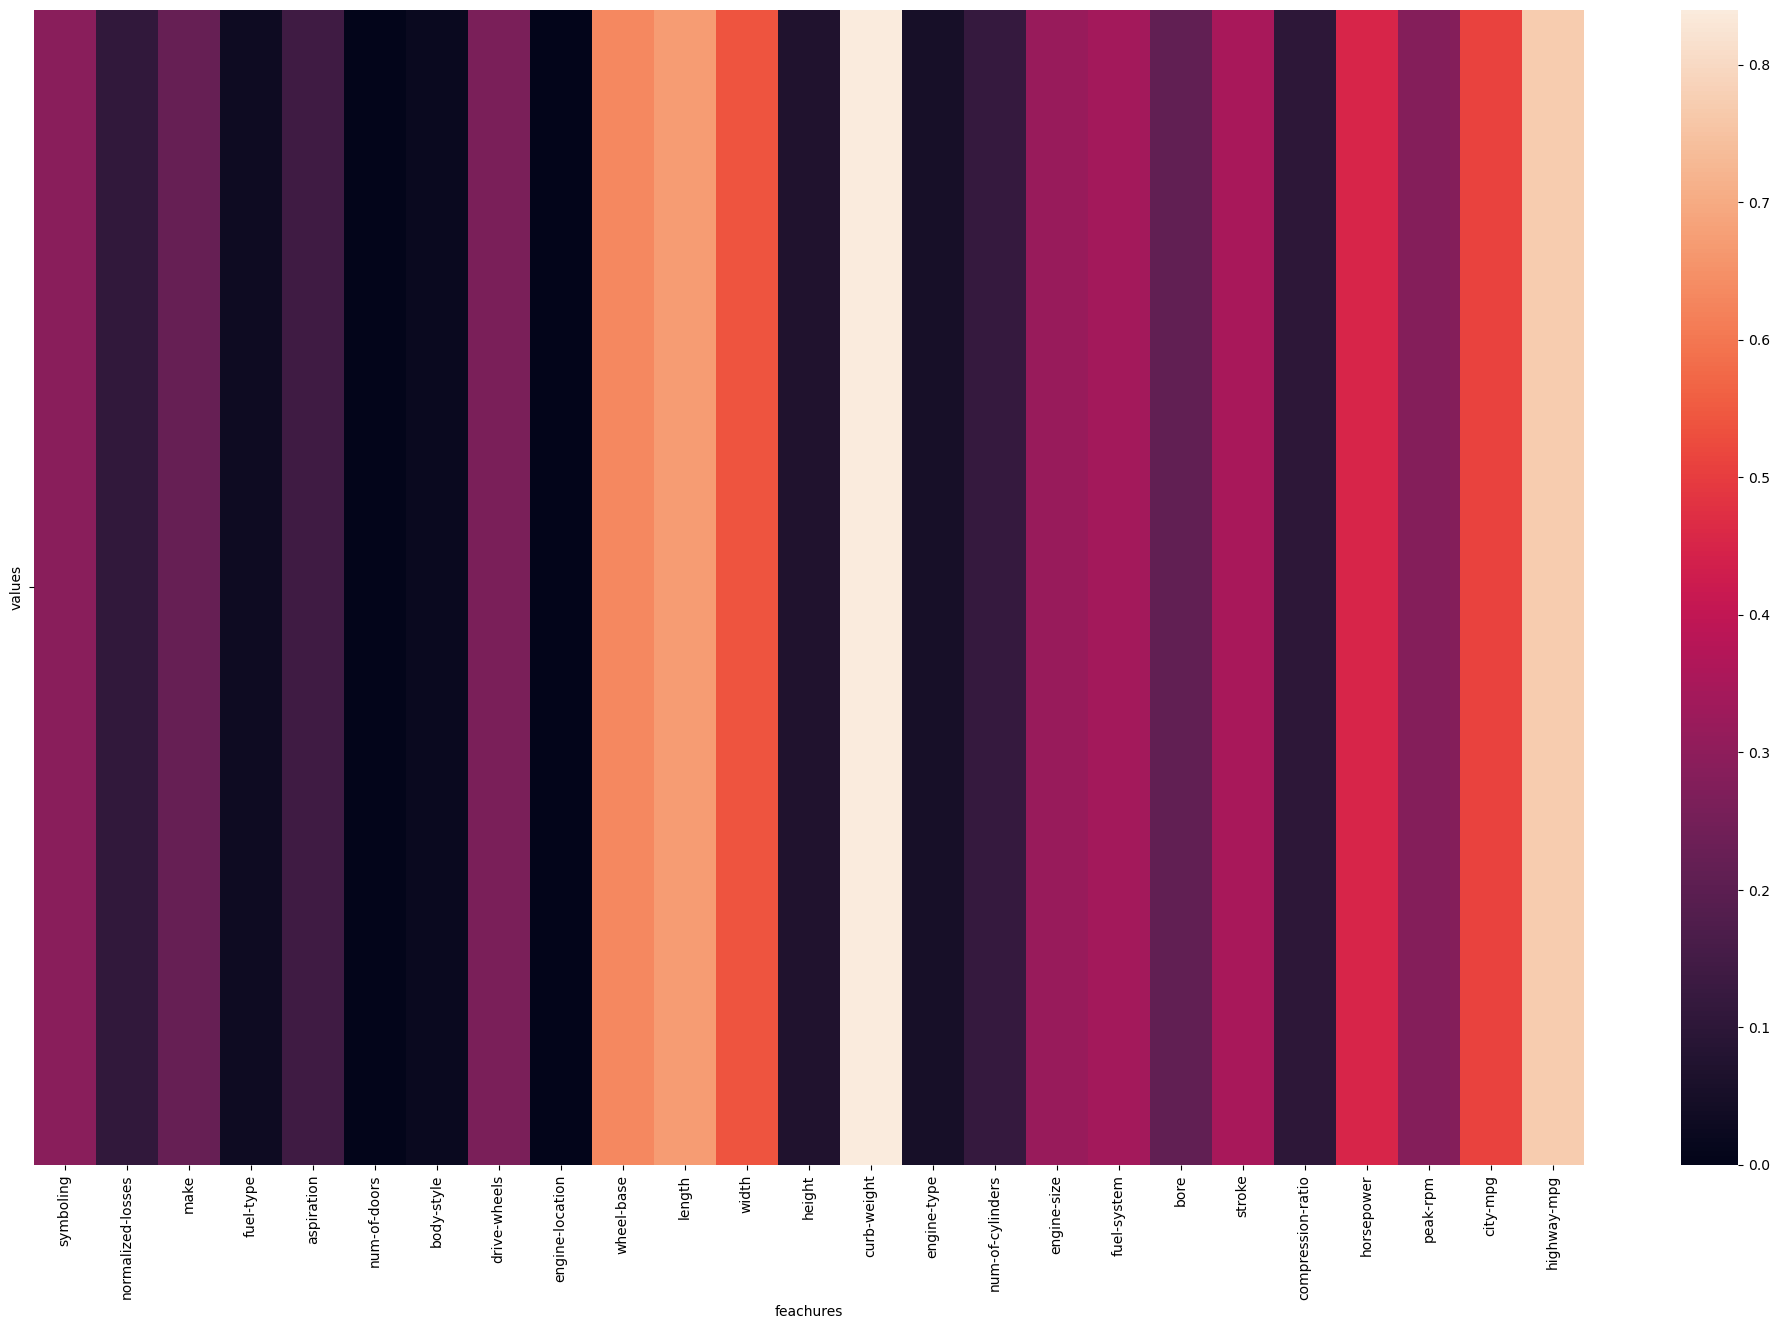

In [485]:


print(res)
# plotting the heatmap 
hm = sns.heatmap(data=res.transpose()) 
  
# displaying the plotted heatmap 
plt.show() 


Simulated Annealing 

In [478]:
from Example.SA import Simulated_Annealing # import the python script with SA.

# define a predictive model
from sklearn.ensemble import ExtraTreesRegressor # we use extratree as predictive model

# define the loss function in SA algorithm
from sklearn.metrics import mean_squared_error # for regression task we use MSE

clf = ExtraTreesRegressor(n_estimators=25)
selector = Simulated_Annealing(loss_func = mean_squared_error, estimator = clf, 
                               init_temp = 0.2, min_temp = 0.005, iteration = 10, alpha = 0.9)
# fit on trainset
# parameters detail can be viewed from SA.py

selector.fit(X_train = train_set, y_train = train_y, cv = 5) # use 5-fold cross-validation

transformed_train = selector.transform(train_set) # transform trainset
transformed_test = selector.transform(test_set)  # transform test set

Stopping condition reached!


In [479]:
selector.best_sol # return the best solution feature index;
selector.best_loss; # return the loss associated with the best solution; 

In [480]:
selector.best_sol

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True])

In [481]:
selector.best_loss

9662376.7548